<a href="https://colab.research.google.com/github/carlosfmorenog/CMM536/blob/master/CMM536_Topic_8/CMM536_T8_Lec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topic 8 - Convolutional Neural Networks
![My network is training!](https://www.dropbox.com/s/z4o984p7307gkhm/mynetistraining.png?raw=1)

## Aims of the Session

* Learn the particularities of Convolutional Neural Networks (CNNs)

* Apply CNNs to image repositories in easy ways

## Resources for the Lecture

* **Deep Learning with Python**. François Chollet. November 2017, ISBN 978161729443. Manning.
    * Very recommendable book, it was written by the author of `Keras`

# Introduction

* For today's lecture and lab we will use the *Hello World!* of image datasets... **MNIST**

* This dataset contains 70'000 images (60k for training and 10k for testing) of handwritten numbers

* The task is to recognise digits from 0 to 9 in $28 \times 28$ images

* This dataset can be obtained ether by importing it through `Tensorflow` or `Keras`

In [ ]:
# Installing Tensorflow and Keras if not installed already
!pip install keras
!pip install tensorflow

In [ ]:
# Import Keras with Tensorflow backend and download the dataset
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'

from keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

Using TensorFlow backend.


In [ ]:
print(X_train.shape,X_test.shape)

(60000, 28, 28) (10000, 28, 28)


* Notice that contrary to my recommendation, this dataset is stored as a 3D matrix

* This means that the dataset has 60k train/10k test rows, each one with a $28 \times 28$ image!

* This is for us to visualise the samples better (afterwards you will see that images need to be flattened to be used)

(28, 28)
The number is: 6


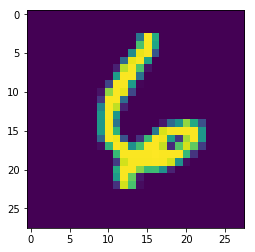

In [ ]:
import matplotlib.pyplot as plt

sample = 59000

print(X_train[sample].shape)
print('The number is: '+str(Y_train[sample]))
plt.imshow(X_train[sample])

# Why do CNNs work better than fully connected networks for images?

## The convolutional operation

* Two types of layers:

* `Dense` layers learn global patterns

* `Conv` learn local patterns

![Fig 1. Local patterns learned from an image](https://www.dropbox.com/s/hq9d4g7pheyttfr/mnistlocal.png?raw=1)

 * CNNs not only classify, but also extract their own features!

* The patterns/features that CNNs learn are **translation invariant**
    * Once it learns it, it can recognise it anywhere in the image

* They can learn **spatial hierarchies** of patterns
    * Each layer learns different type of features
        * First layer learns edges, second learns larger patterns, and so on

![Fig 2. How a CNN learns features](https://www.dropbox.com/s/vc3rukz9excn8ev/featlearn.png?raw=1)

## How do CNNs learn?

* The images of the **MNIST** dataset are all $28 \times 28$ pixels

* The first **convolution** layer takes a $(28, 28, 1)$ image and outputs a **feature map** of size $(26, 26, 32)$ 

* This is because it computes $32$ **filters** over the input!

* That means that after the first layer, the network transforms the training images into 32 output channels, each containing a $26 \times 26$ filter, which is a **response map**

![Fig 3. Visual representation of a response map](https://www.dropbox.com/s/qxvuudn5hde4myz/responsemap.png?raw=1)

* A response map is the response of a filter at different locations of the input

* This is how CNNs extract features; by applying filters over the images and finding responses to them!

**Why is the response map $26 \times 26$?**

**Why 32 filters?**

## Basic Parameters of CNNs

* **Size of the patches extracted:** Typically $3 \times 3$ or $5 \times 5$. In the example above, you can see $3 \times 3$

* **Depth of the output feature map:** Number of filters. This can change, i.e. can start with a *depth* of 32 and finish with 64

In `Keras`, you can import a `Conv2D` layer, to which you can pass these values

## How do Convolution Layers Work?

* A convolution layer works by sliding the patches over the 3D input map, stopping at every location and extracting the 3D patch

* Each of these patches is flattened into a 1D vector of size (`output_depth`,)

* The process can be best illustrated using the following figure:

![Fig 4. How convolutional layers work](https://www.dropbox.com/s/3kxrju32c0ggu7y/transform.png?raw=1)

## Border Effect and Strides

* Notice that we started with a $(28, 28, 1)$ image and we ended with a $(26, 26, 32)$ **feature map**!

* Two main reasons for not having the same width & height:
    * The **border effect** (which can be countered by applying `padding`)
    * The use of **strides**

### The Border Effect & Padding

* Remember that a CNN uses a convolution layer that applies a filter for each position of the image, similar to sliding a window throughout the image

* By nature, this sliding window cannot be centered exactly throughout the entire image!

* For instance, in a $5 \times 5$ feature map, you could only center a $3 \times 3$ window in 9 positions as shown in the image below:

![Fig 5. Valid locations of 3x3 patches in 5x5 input](https://www.dropbox.com/s/cgkjmxzn9nxkmsm/window.png?raw=1)

* If you want to get an output with the same size as the input, you need to apply `padding`

* In short, this is like adding a *margin* to the image so that the filter can be centered in more positions!

* In the next figure you can see how the $3 \times 3$ filter can be located in 25 positions now, thus delivering a $5 \times 5$ output

![Fig 6. How padding works](https://www.dropbox.com/s/6jesljdoxa5v5nq/padding.png?raw=1)

* In the `Conv2D` function in `Keras`, padding is enabled by setting the parameter `padding = 'valid'`

### Striding

* When images are considerably large, you don't want the sliding window to stop at every position!

* You may introduce a parameter called `stride` which allows your convolution window to skip positions

* A `stride=1` stops in every position, but for instance `stride=2` will make the filter to move with a step of 2, this skipping half of the positions!

* Recall the example presented before. Without considering padding, the $3 \times 3$ filter will only stop at four positions of the image

![Fig 7. Stride of 2](https://www.dropbox.com/s/scuaobz41fxks8t/strideof2.png?raw=1)

* This is rarely used in practice (people don't want to lose important features in between the image)

* It is more recommended to use `Max Pooling`

### Max Pooling

* You can add to your model a `Max Pooling` layer which halves your feature map

* Max pooling extracts windows from the input much like a convolution

* Why should we use it? Imagine a CNN with no max pooling:

![Fig 8. Example of a CNN in Keras with no max pooling](https://www.dropbox.com/s/ryc28146axk23ej/nomaxpooling.png?raw=1)

We can print the summary of the model with the following code:

![Fig 9. Summary of a CNN without max pooling](https://www.dropbox.com/s/oi3djvi7k85b86d/nomaxpoolingsummary.png?raw=1)

* Notice that the number of parameters grow drastically after each layer
    * The final feature map (the one with $22 \times 22 \times 64 = 36'928$ parameters) has to be `flattened` and then a `Dense` layer has to be applied, resulting in 15 million parameters!

* However, the model isn't learning a **hierarchy** of features! This means that as layers progress, the CNN would get smaller and smaller images and thus will be unable to learn the features

* You need the last layer to contain information about the whole image

### The Flatten Layer

* Not to be confused with flattening an image!

* After a convolution layer and before a `Dense` (i.e. fully connected layer), there is a `flatten` layer that transforms the matrix feature maps into vectors for the `Dense` layer to operate

![Fig 10. The flatten layer in a CNN](https://www.dropbox.com/s/zicquaubtbbuzdv/flattencnn.png?raw=1)

### Final example of a CNN

![Fig 11. Final example of a CNN](https://www.dropbox.com/s/4tlkt6myhu8fn4x/finalcnn.png?raw=1)

I recommend you to also read [this source](https://medium.com/@RaghavPrabhu/understanding-of-convolutional-neural-network-cnn-deep-learning-99760835f148) if you have questions regarding any of the steps

# Other useful concepts

* The following are not exclusive to CNNs, and are widely used in all NNs to further improve performance

### Dropout

* Reduces overfitting

* As said before, it is rare that you use a fully connected layer as this may extract features that are too related to each other!

* You implement a dropout percent per layer. This randomly disconnects layers from the previous layer into the current one

### Epochs

* Machine learning has by default an iterative nature (recall Gradient Descent)
    * The more you iterate things, the "better"!

* An epoch occurs when the entire dataset is passed forward and backward through the network once.

* By passing the dataset multiple times, you can further reduce the loss and increase the training/validation accuracy

**The more epochs, the better?**

Not necessarily, as everything in life, bigger is not always better! CNNs can stall or overfit when trained a lot

### Batch Size

* Imagine training a network with the MNIST dataset

* You would need to pass 60k images in each epoch
! This would take a while!

* You can set a `batch_size` to pass your data in chunks

* This may have an effect on your training results if the sequence of batches is not properly set
    * i.e. if you only pass batches from the negative class first, and then the positive one, your classifier may get biased towards the first class before being able to learn from the second.

### The ADAM Optimiser

* A faster way to optimise gradient descent compared to the solution seen last week

* It may obtain worse results, but compensates with speed!

* Combination of RMSprop and Stochastic Gradient Descent with momentum. More info [here](https://towardsdatascience.com/adam-latest-trends-in-deep-learning-optimization-6be9a291375c)

## Some common CNN problems

![Fig 12. The most common mistake when using CNNs](https://www.dropbox.com/s/z4xrn157wxpoygk/cnn.jpg?raw=1)

Translation but not rotation invariant, and they learn with the focus of the training images

![Fig 13. The 2nd most common mistake when using CNNs](https://www.dropbox.com/s/d7ewodct05f1m13/dogpigloaf.gif?raw=1)

CNNs don't know when to stop classifying (especially in video) and can produce unstable results. In the end, hey are also probabilistic models!

In [ ]:
import warnings; 
warnings.simplefilter('ignore')
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/vIci3C4JkL0?start=50" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

You need to carefully choose your training classes!

# Lab